In [43]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [45]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [46]:
df.shape

(183978, 42)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [48]:
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [49]:
df=df.dropna()

In [50]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [51]:
df.shape


(180354, 42)

In [52]:
# Feature selection - Since we have about 40 different features, we can run some feature selection algorithms to reduce
# the size of our featureset.
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE

In [53]:
df_new=df.copy()

In [54]:
df_new = df_new.select_dtypes(["int64","float64"])
#here we ignored object datatypes

In [55]:
df_new.shape

(180354, 38)

In [56]:
X = df_new.drop('overall_rating',axis=1).values
y = df_new['overall_rating'].values.ravel()
from sklearn.preprocessing import scale
X = scale(X)

In [57]:
df_1 = df_new.drop('overall_rating',axis=1)

In [58]:
X.shape

(180354, 37)

In [59]:
y.shape

(180354,)

In [60]:
# Feature Selection using RFE Scikit Library
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 10)
rfe_fit = rfe.fit(X, y)
features = []
for feat in df_1.columns[rfe_fit.support_]:
    print(feat)
    features.append(feat)

player_api_id
potential
heading_accuracy
short_passing
ball_control
reactions
strength
gk_diving
gk_kicking
gk_positioning


In [61]:
features

['player_api_id',
 'potential',
 'heading_accuracy',
 'short_passing',
 'ball_control',
 'reactions',
 'strength',
 'gk_diving',
 'gk_kicking',
 'gk_positioning']

In [62]:
# Using Statsmodel to illustrate the summary results
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select = 15)
rfe_fit = rfe.fit(X, y)
features = []
for feat in df_1.columns[rfe_fit.support_]:
    print(feat)
    features.append(feat)

player_fifa_api_id
player_api_id
potential
heading_accuracy
short_passing
ball_control
acceleration
reactions
strength
marking
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes


In [63]:
df_optm = df_new[features]

In [64]:
df_optm.shape

(180354, 15)

In [65]:
df_optm

,player_fifa_api_id,player_api_id,potential,heading_accuracy,short_passing,ball_control,acceleration,reactions,strength,marking,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,218353,505942,71.0,71.0,61.0,49.0,60.0,47.0,76.0,65.0,6.0,11.0,10.0,8.0,8.0
1,218353,505942,71.0,71.0,61.0,49.0,60.0,47.0,76.0,65.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,66.0,71.0,61.0,49.0,60.0,47.0,76.0,65.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,65.0,70.0,60.0,48.0,60.0,46.0,76.0,62.0,5.0,10.0,9.0,7.0,7.0
4,218353,505942,65.0,70.0,60.0,48.0,60.0,46.0,76.0,62.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,102359,39902,85.0,59.0,89.0,85.0,66.0,86.0,67.0,22.0,9.0,20.0,84.0,20.0,20.0
183974,102359,39902,80.0,53.0,84.0,86.0,66.0,74.0,65.0,32.0,9.0,20.0,73.0,20.0,20.0
183975,102359,39902,80.0,53.0,84.0,86.0,66.0,74.0,65.0,32.0,9.0,20.0,73.0,20.0,20.0
183976,102359,39902,81.0,57.0,86.0,91.0,61.0,69.0,59.0,28.0,9.0,20.0,73.0,20.0,20.0


In [66]:
df_optm.drop(['player_fifa_api_id','player_api_id'],axis=1,inplace=True)

In [67]:
df_optm.head()

,potential,heading_accuracy,short_passing,ball_control,acceleration,reactions,strength,marking,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.0,71.0,61.0,49.0,60.0,47.0,76.0,65.0,6.0,11.0,10.0,8.0,8.0
1,71.0,71.0,61.0,49.0,60.0,47.0,76.0,65.0,6.0,11.0,10.0,8.0,8.0
2,66.0,71.0,61.0,49.0,60.0,47.0,76.0,65.0,6.0,11.0,10.0,8.0,8.0
3,65.0,70.0,60.0,48.0,60.0,46.0,76.0,62.0,5.0,10.0,9.0,7.0,7.0
4,65.0,70.0,60.0,48.0,60.0,46.0,76.0,62.0,5.0,10.0,9.0,7.0,7.0


In [26]:
df_optm.shape

(180354, 13)

In [71]:
# Data Exploration using visualization
df_corr = df_optm.corr()

In [72]:
#create correlation matrix with absolute values
df_corr = df_optm.corr().abs()
#select upper triangle of matrix
up_tri = df_corr.where(np.triu(np.ones(df_corr.shape[1]),k=1).astype(np.bool))
#find all the features which have a correlation > 0.75 with other features.
corr_features = [ column for column in up_tri.columns if any(up_tri[column]>
0.75)]
#Print Correlated features
print(corr_features)

['ball_control', 'gk_handling', 'gk_positioning', 'gk_reflexes']


In [73]:
#Drop Correlated Features
df_no_corr = df_optm.drop(corr_features,axis=1)
df_no_corr.head()
df_no_corr.shape

(180354, 9)

In [74]:
df_no_corr.head()

,potential,heading_accuracy,short_passing,acceleration,reactions,strength,marking,gk_diving,gk_kicking
0,71.0,71.0,61.0,60.0,47.0,76.0,65.0,6.0,10.0
1,71.0,71.0,61.0,60.0,47.0,76.0,65.0,6.0,10.0
2,66.0,71.0,61.0,60.0,47.0,76.0,65.0,6.0,10.0
3,65.0,70.0,60.0,60.0,46.0,76.0,62.0,5.0,9.0
4,65.0,70.0,60.0,60.0,46.0,76.0,62.0,5.0,9.0


In [75]:
y.shape

(180354,)

In [77]:
X.shape

(180354, 37)

In [78]:
df_no_corr.shape

(180354, 9)

In [82]:
# Split the input data into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_no_corr,y,test_size=0.25,random_state=0)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)

X_train Shape :  (135265, 9)
X_test Shape :  (45089, 9)
Y_train Shape :  (135265,)
Y_test.shape :  (45089,)


In [83]:
# Applying Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, Y_train)# train the model

LinearRegression()

In [84]:
lm.score(X_train,Y_train)

0.8203495080812946

In [85]:
X_test.shape

(45089, 9)

In [86]:
X_test.head()

,potential,heading_accuracy,short_passing,acceleration,reactions,strength,marking,gk_diving,gk_kicking
168247,76.0,67.0,79.0,68.0,67.0,84.0,68.0,2.0,4.0
175933,76.0,58.0,80.0,76.0,65.0,65.0,37.0,7.0,10.0
178229,72.0,55.0,72.0,73.0,65.0,55.0,47.0,6.0,13.0
106479,72.0,76.0,64.0,51.0,68.0,88.0,72.0,7.0,9.0
161191,79.0,53.0,79.0,64.0,72.0,60.0,42.0,9.0,11.0


In [87]:
lm.predict(X_test)

array([72.14310753, 70.92827683, 66.83437794, ..., 70.19833167,
       71.78389353, 67.75717603])

In [88]:
lm.predict([[76.0,67.0,79.0,68.0,67.0,84.0,68.0,2.0,4.0]])

array([72.14310753])

In [89]:
import pickle


pickle.dump(lm, open('mlproject.pkl','wb'))

In [36]:
# # Using Statsmodels for analysing the impact of attribute potential on the player rating
# import statsmodels.api as sm
# model1 = sm.OLS(df_new['overall_rating'],df_new['potential'])
# result1 = model1.fit()
# # print(result1.summary())

                                 OLS Regression Results                                
Dep. Variable:         overall_rating   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.062e+07
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                        0.00
Time:                        18:40:33   Log-Likelihood:                     -5.3063e+05
No. Observations:              180354   AIC:                                  1.061e+06
Df Residuals:                  180353   BIC:                                  1.061e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [37]:
# Using Statsmodels for analysing the impact of all attribute on the player rating
X_new = df_new[features].values
model = sm.OLS(df_new['overall_rating'],df_new[features])
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:         overall_rating   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          8.035e+06
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                        0.00
Time:                        18:41:26   Log-Likelihood:                     -4.3282e+05
No. Observations:              180354   AIC:                                  8.657e+05
Df Residuals:                  180339   BIC:                                  8.658e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [41]:
# Explanation of the OLS Regression Results :
# Adjusted R-squared indicates that 99.9% of player ratings can be explained by our predictor variable.
# The regression coefficient (coef) represents the change in the dependent variable resulting from a one unit change in
# the predictor variable, all other variables being held constant.
# In our model, a one unit increase in potential increases the rating by 0.4525.
# The standard error measures the accuracy of potential's coefficient by estimating the variation of the coefficient
# if the same test were run on a different sample of our population.
# Our standard error,0.001, is low and therefore appears accurate.
# The p-value means the probability of an 0.4525 increasing in player rating due to a one unit increase in potential
# is 0% , assuming there is no relationship between the two variables.
# A low p-value indicates that the results are statistically significant, thatis in general the p-value is less than 0.05.
# The confidence interval is a range within which our coefficient is likely tofall. We can be 95% confident that
# potentials's coefficient will be within our confidence interval, [0.450,0.455].
# Warnings in the Summary provided by statsmodels OLS model
# Multicollinearity: A careful observer would've noticed the warnings producedby our model regarding multicollinearity.
# We have two or more variables telling roughly the same story, overstating the value of each of the predictors.

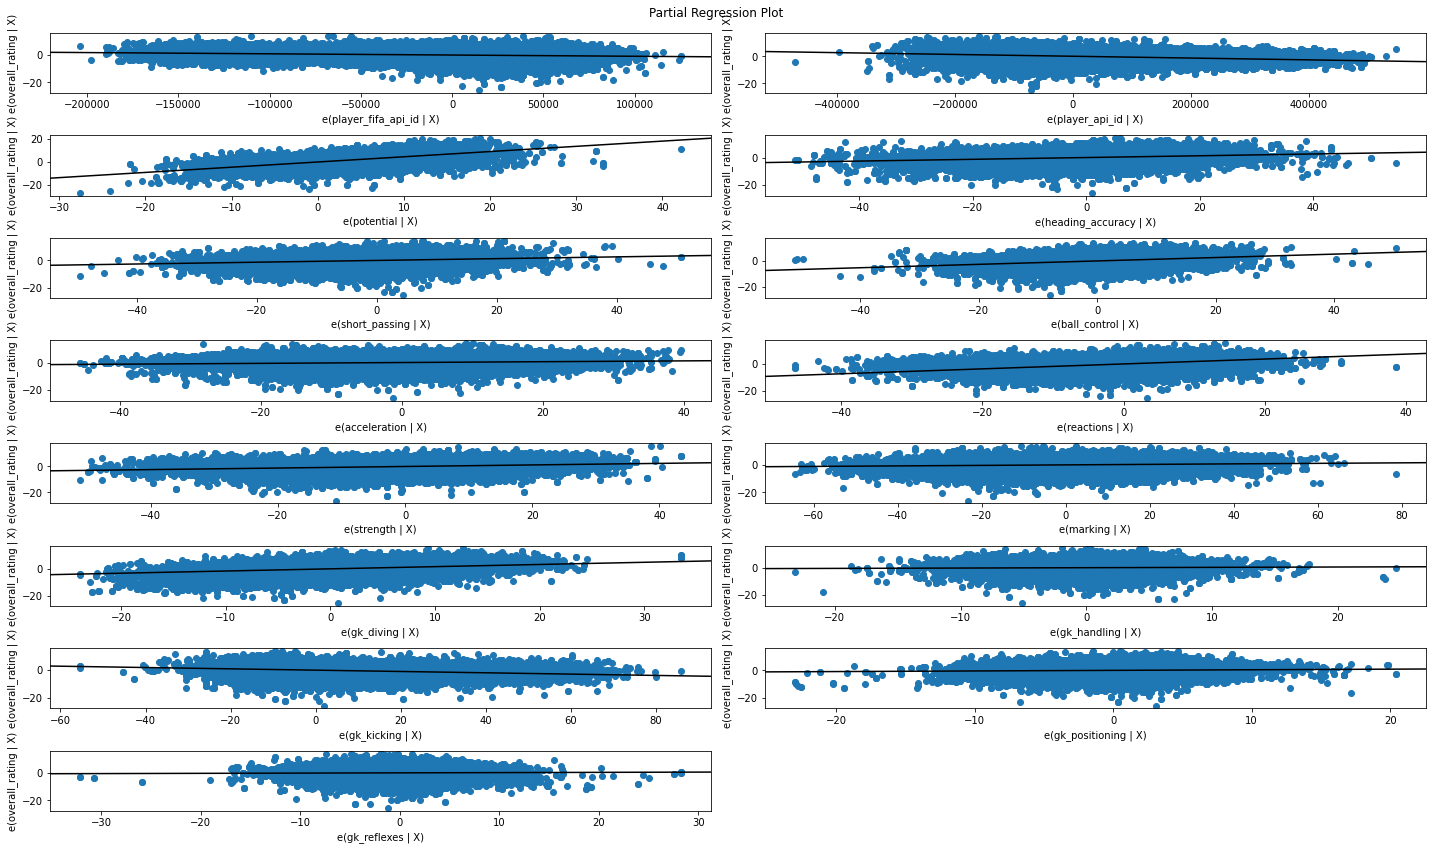

In [42]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

In [45]:
import statsmodels.formula.api as smf
# only include TV and Radio in the model
lm = smf.ols(formula='overall_rating ~ player_fifa_api_id + player_api_id +potential +heading_accuracy +short_passing +ball_control +acceleration +reactions +strength +marking +gk_diving +gk_handling +gk_kicking +gk_positioning +gk_reflexes ', data=df_new).fit()
print('Confidence of the statsmodel for the input data : ',lm.rsquared)

Confidence of the statsmodel for the input data :  0.8561047414083595


In [46]:
df_new.head()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [75]:
df_optm.head()
df_optm.shape

(180354, 39)

In [48]:
# Data Exploration using visualization
df_corr = df_new.corr()

The features contain high corelation .We need to remove them first before applying Regression Techniques.


<AxesSubplot:>

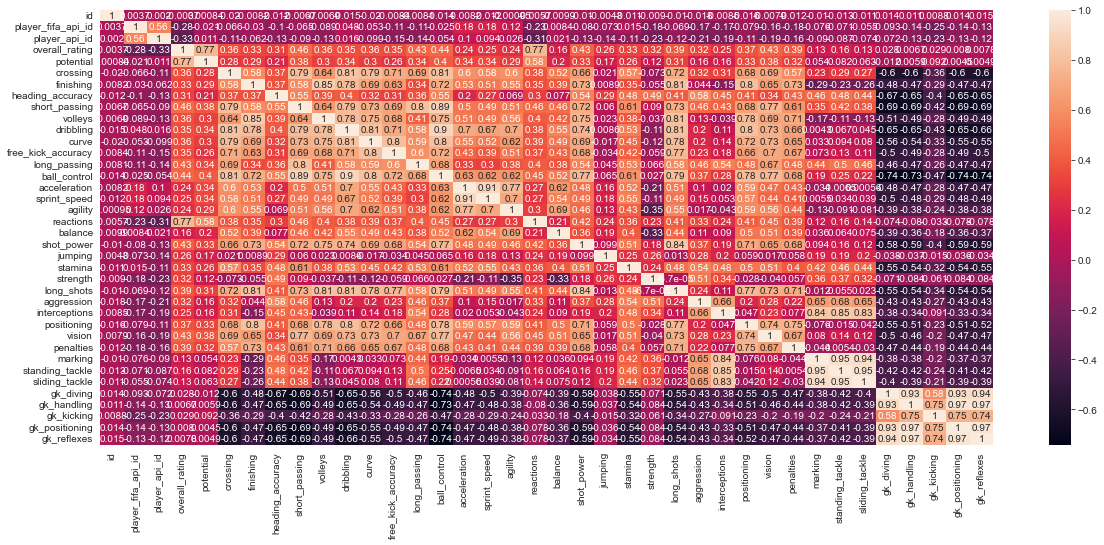

In [50]:
print('The features contain high corelation .We need to remove them first before applying Regression Techniques.')
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(20,8))
sns.heatmap(df_corr,annot=True)

In [51]:
#create correlation matrix with absolute values
df_corr = df_new.corr().abs()
#select upper triangle of matrix
up_tri = df_corr.where(np.triu(np.ones(df_corr.shape[1]),k=1).astype(np.bool))
#find all the features which have a correlation > 0.75 with other features.
corr_features = [ column for column in up_tri.columns if any(up_tri[column]>
0.75)]
#Print Correlated features
print(corr_features)

['potential', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'sprint_speed', 'agility', 'reactions', 'shot_power', 'long_shots', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_handling', 'gk_positioning', 'gk_reflexes']


In [55]:
#Drop Correlated Features
df_no_corr = df_new.drop(corr_features,axis=1)
df_no_corr.head()
df_no_corr.shape

(180354, 16)

In [54]:
# This shows that the feature selection API - sklearn.feature_selection.RFE has resulted in the same feature
# selection for top 15 features selected.
# Quant Features against Rating
len(df_no_corr.columns)

16

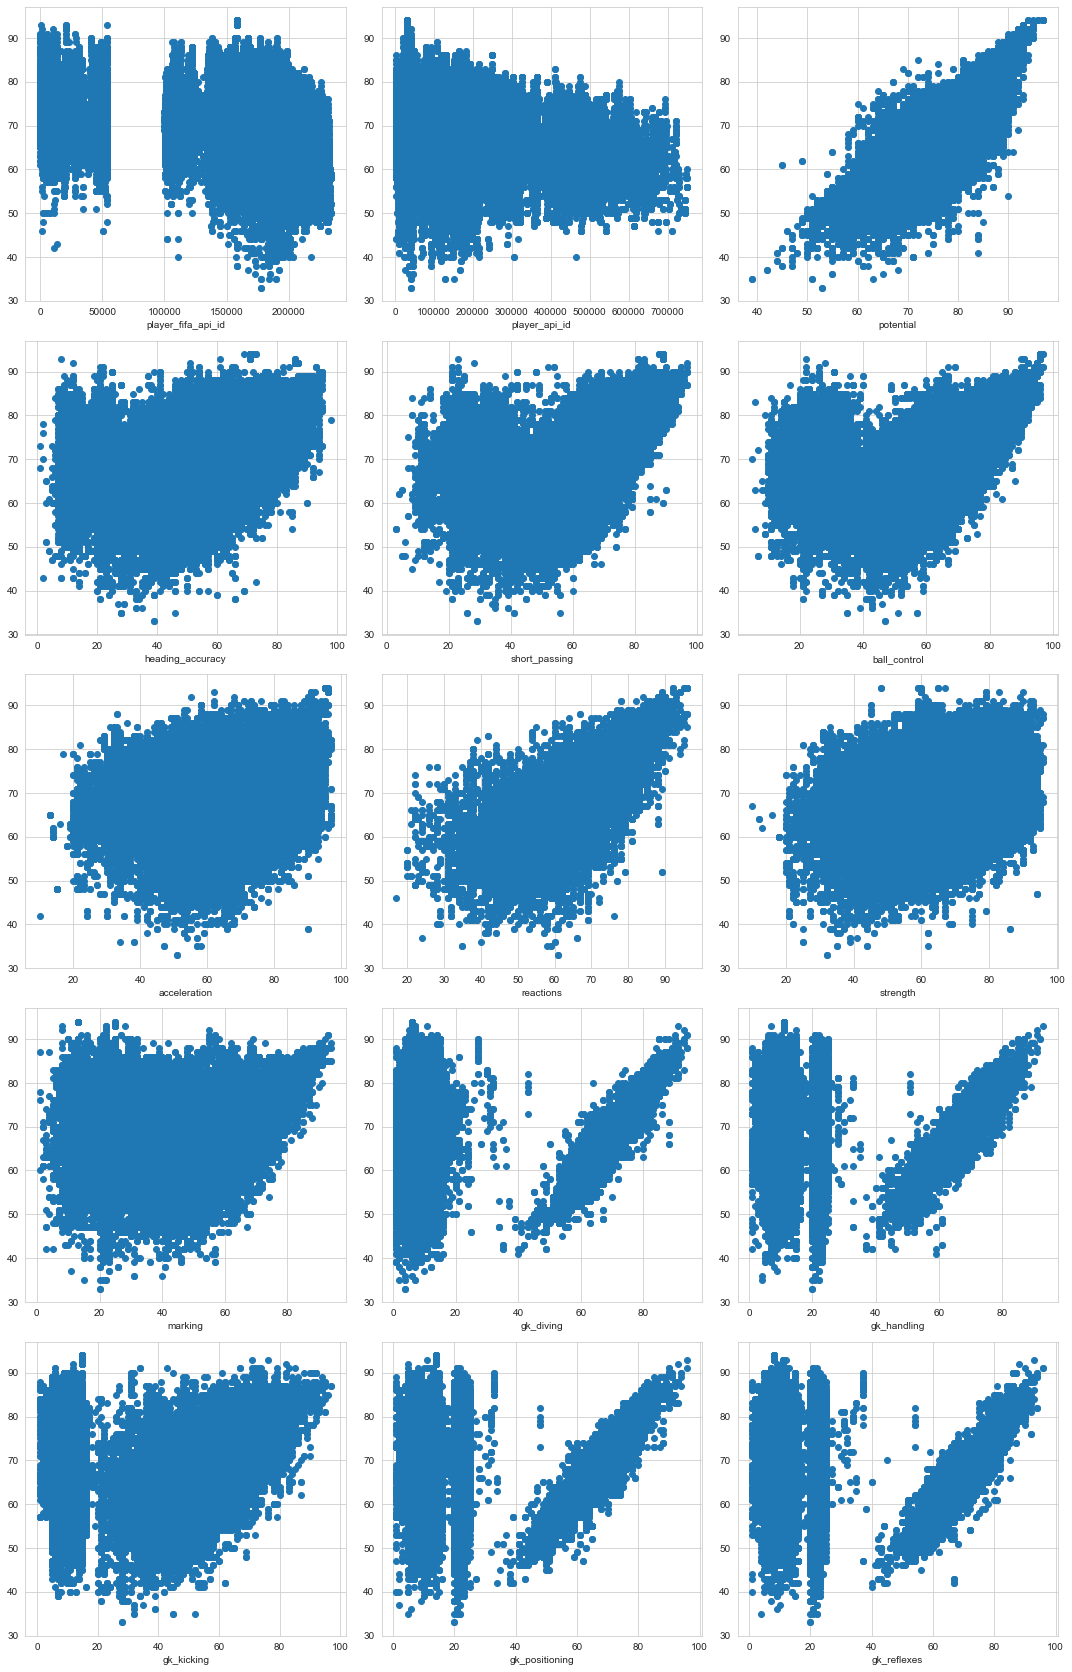

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,60))
val = df_optm.shape[1]
for idx in range(val):
    feature = df_optm.columns[idx]
    ax = fig.add_subplot(13,3,idx+1)
    Xtmp = df_optm[feature]
    ax.scatter(Xtmp, y)
    ax.set_xlabel(feature)
plt.tight_layout()
plt.show()

In [58]:
# Split the input data into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=0)
print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)

X_train Shape :  (135265, 37)
X_test Shape :  (45089, 37)
Y_train Shape :  (135265,)
Y_test.shape :  (45089,)


In [59]:
# # Applying Linear Regression Model
# lm = LinearRegression()
# lm.fit(X_train, Y_train)# train the model

LinearRegression()

In [60]:
# Perform Prediction using Linear Regression Model
Y_pred = lm.predict(X_test) # predict the prices based on the test data
Y_pred

array([73.7540343 , 68.6553135 , 67.22791452, ..., 71.40624478,
       71.86342991, 64.61795956])

In [62]:
print("The variance score of the LinearRegression model is : ",lm.score(X_test,Y_test))
print('Since variance score is near about 1 it seems to be a perfect prediction')

The variance score of the LinearRegression model is :  0.8582903213473387
Since variance score is near about 1 it seems to be a perfect prediction


In [113]:
# Evaluate Linear Regression Accuracy using Root Mean Square Error
from sklearn.metrics import mean_squared_error
print("Error Rate of the Regression Model : ",sqrt(mean_squared_error(Y_pred,Y_test)))

Error Rate of the Regression Model :  1.4021302330777266


In [114]:
# Applying Decision Tree Regressor Model to the input data
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=20)

In [115]:
# Perform Prediction using Decision Tree Regressor
Y_pred = regressor.predict(X_test)
Y_pred

array([76.        , 72.14285714, 67.        , ..., 74.        ,
       74.75862069, 67.4       ])

In [116]:
print("The variance score of the DecisionTreeRegressor model is : ",regressor.score(X_test,Y_test))
print('Since variance score is near about 1 it seems to be a perfect prediction')

The variance score of the DecisionTreeRegressor model is :  0.9306202383743756
Since variance score is near about 1 it seems to be a perfect prediction


In [117]:
Y_test.mean()

68.65286433498193

In [118]:
Y_pred.mean()

68.6351108304185

In [119]:
# Evaluate Linear Regression Accuracy using Root Mean Square Error For DecisionTreeRegressor model
print("Error Rate of the DecisionTreeRegressor Model : ",sqrt(mean_squared_error(Y_pred,Y_test)))
print('The DecisionTreeRegressor Model performs better than the LinearRegression Model as eveident from the error rate')

Error Rate of the DecisionTreeRegressor Model :  1.8377203722898365
The DecisionTreeRegressor Model performs better than the LinearRegression Model as eveident from the error rate


In [71]:
# Obtaining predictions by cross-validation for the Regression Models
df_optm = df_new.copy()
df_optm['rating'] = y
df_optm.head()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,62.0
3,4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0
4,5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0


In [72]:
from sklearn.model_selection import cross_val_predict
X = df_optm.drop('rating',axis=1)
Y = df_optm['rating']
predicted = cross_val_predict(regressor, X, Y, cv=10)

In [74]:
from sklearn.metrics import accuracy_score
print( "Accuracy Score of the DecisionTreeRegressor Model is : " ,accuracy_score(Y.astype(int), predicted) )

Accuracy Score of the DecisionTreeRegressor Model is :  0.9997782139569957


In [ ]:
# Calculate Error using K-Fold Cross validation
from sklearn.cross_validation import KFold
kfold = KFold(len(df_optm),n_folds=10,shuffle=True,random_state=0)